In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import torchvision

In [3]:
celeba = torchvision.datasets.CelebA(root="data/", split="all", download=True)

Files already downloaded and verified


In [7]:
data_loader = torch.utils.data.DataLoader(celeba,
                                          batch_size=16,
                                          shuffle=False,
                                          num_workers=1)

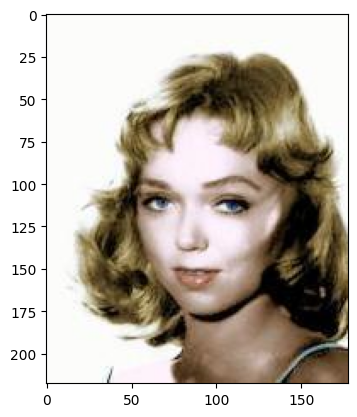

In [6]:
import matplotlib.pyplot as plt
plt.imshow(celeba[-1][0])
plt.show()

tensor([32])
[('5_o_Clock_Shadow', False), ('Arched_Eyebrows', True), ('Attractive', True), ('Bags_Under_Eyes', False), ('Bald', False), ('Bangs', False), ('Big_Lips', False), ('Big_Nose', False), ('Black_Hair', False), ('Blond_Hair', True), ('Blurry', False), ('Brown_Hair', False), ('Bushy_Eyebrows', False), ('Chubby', False), ('Double_Chin', False), ('Eyeglasses', False), ('Goatee', False), ('Gray_Hair', False), ('Heavy_Makeup', True), ('High_Cheekbones', True), ('Male', False), ('Mouth_Slightly_Open', True), ('Mustache', False), ('Narrow_Eyes', False), ('No_Beard', True), ('Oval_Face', True), ('Pale_Skin', False), ('Pointy_Nose', True), ('Receding_Hairline', False), ('Rosy_Cheeks', True), ('Sideburns', False), ('Smiling', True), ('Straight_Hair', False), ('Wavy_Hair', False), ('Wearing_Earrings', True), ('Wearing_Hat', False), ('Wearing_Lipstick', True), ('Wearing_Necklace', False), ('Wearing_Necktie', False), ('Young', True)]


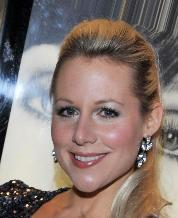

In [90]:
index = 123456
print(celeba.identity[index])
attr_bools = [bool(x) for x in celeba.attr[index]]
print(list(zip(celeba.attr_names, attr_bools)))
celeba[index][0]

Max number of images for a single identity: 35
Number of identities with only one image: 44


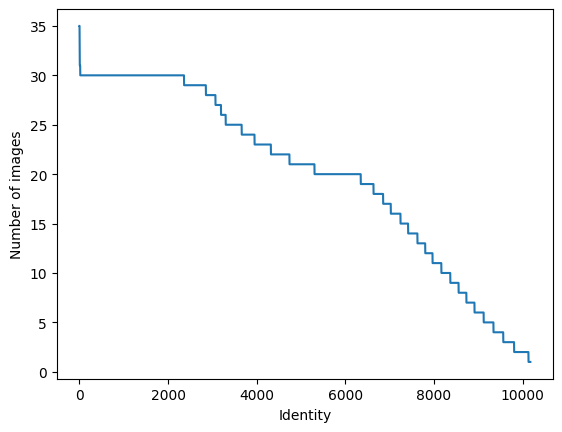

In [75]:
# Make a plot of the identities, where x-axis is the identity, sorted by number of images, and y-axis is the number of images in the dataset
from matplotlib import pyplot as plt
from collections import Counter

identities = [celeba.identity[i].item() for i in range(len(celeba))]
counts = Counter(identities)
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

print("Max number of images for a single identity:", sorted_counts[0][1])
print("Number of identities with only one image:", sum([1 for x in sorted_counts if x[1] == 1]))

plt.plot([x[1] for x in sorted_counts])
plt.xlabel("Identity")
plt.ylabel("Number of images")
plt.show()